In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle


In [2]:
import pyodbc

In [3]:
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=DESKTOP-7K1D2RJ;"  # Change server name if needed
    "Database=DWH;"
    "Trusted_Connection=yes;"
)

In [4]:
query = "SELECT * FROM Dim_Customer"
df = pd.read_sql(query, conn)

C:\Users\Ichrak\AppData\Local\Temp\ipykernel_1068\3666623553.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
df.head(10)

,ID_Customer,Gender,Age,Annual_Income,Spending_Score__1_100,Profession,Work_Experience,Family_Size
0,30001,Male,19,15000,39,Healthcare,1,4
1,30002,Male,21,35000,81,Engineer,3,3
2,30003,Female,20,86000,6,Engineer,1,1
3,30004,Female,23,59000,77,Lawyer,0,2
4,30005,Female,31,38000,40,Entertainment,2,6
5,30006,Female,22,58000,76,Artist,0,2
6,30007,Female,35,31000,6,Healthcare,1,3
7,30008,Female,23,84000,94,Healthcare,1,3
8,30009,Male,64,97000,3,Engineer,0,3
9,30010,Female,30,98000,72,Artist,1,4


In [8]:
df.info()               # Check data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_Customer            2000 non-null   int64 
 1   Gender                 2000 non-null   object
 2   Age                    2000 non-null   int64 
 3   Annual_Income          2000 non-null   int64 
 4   Spending_Score__1_100  2000 non-null   int64 
 5   Profession             2000 non-null   object
 6   Work_Experience        2000 non-null   int64 
 7   Family_Size            2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [9]:
df.duplicated().sum()   # Duplicates

0

In [11]:
df.duplicated().sum()   # Duplicates

0

In [12]:
from sklearn.preprocessing import LabelEncoder


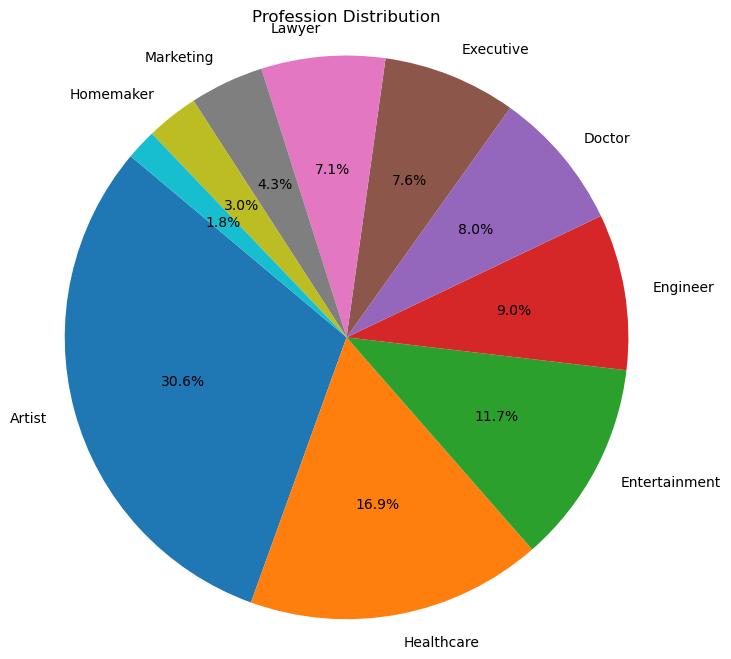

In [13]:
df['Profession'] = df['Profession'].fillna('Unknown')

# Count each profession
profession_counts = df['Profession'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Profession Distribution")
plt.axis('equal')  # Make it a circle
plt.show()

In [14]:
# Handle missing values in 'Profession'
df['Profession'] = df['Profession'].fillna('Unknown')

# Initialize LabelEncoder
le_gender = LabelEncoder()
le_profession = LabelEncoder()

# Encode 'Gender'
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Encode 'Profession'
df['Profession'] = le_profession.fit_transform(df['Profession'])

# Check result
print(df.dtypes)
print(df[['Gender', 'Profession']].head())

ID_Customer              int64
Gender                   int32
Age                      int64
Annual_Income            int64
Spending_Score__1_100    int64
Profession               int32
Work_Experience          int64
Family_Size              int64
dtype: object
   Gender  Profession
0       1           6
1       1           3
2       0           3
3       0           8
4       0           4


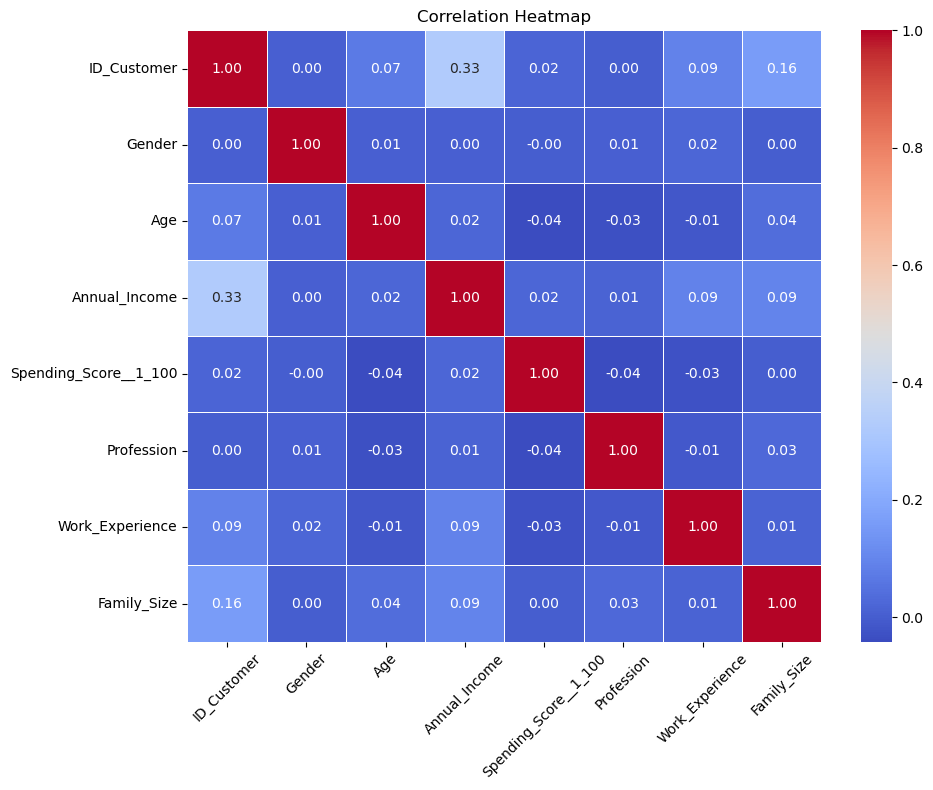

In [15]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
df = df.drop(columns=['ID_Customer'])

# Confirm it’s gone
print(df.columns)

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score__1_100', 'Profession',
       'Work_Experience', 'Family_Size'],
      dtype='object')


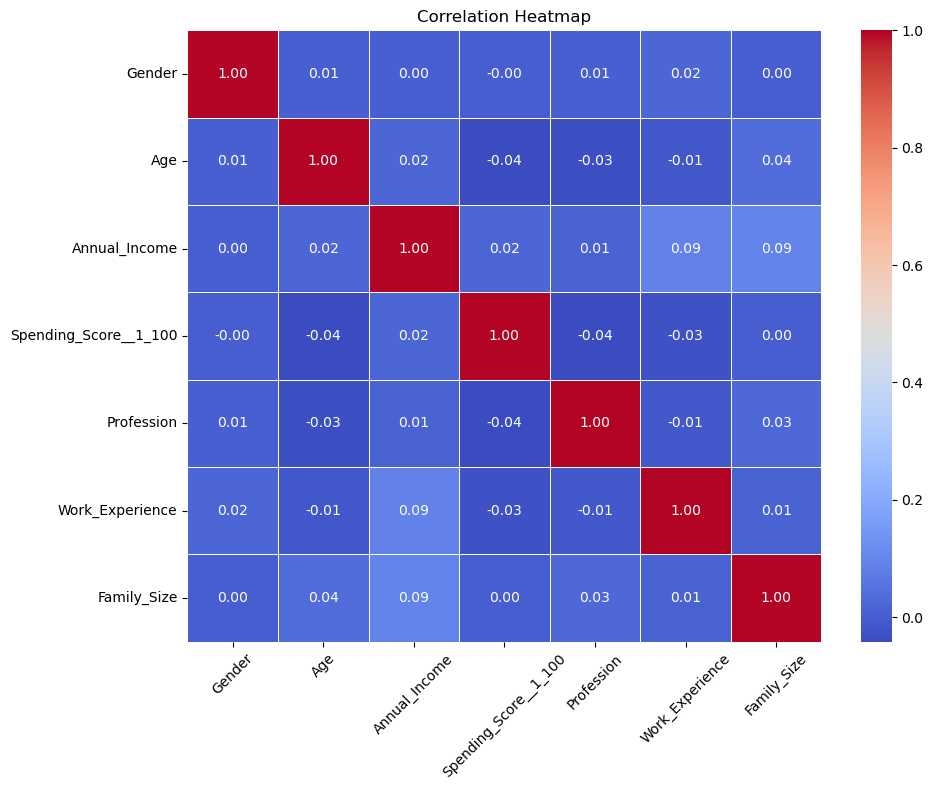

In [17]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

In [19]:
features = df[['Gender', 'Age', 'Annual_Income', 'Spending_Score__1_100',
               'Profession', 'Work_Experience', 'Family_Size']]
features = features.drop(columns=['Profession'])


features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Gender                 2000 non-null   int32
 1   Age                    2000 non-null   int64
 2   Annual_Income          2000 non-null   int64
 3   Spending_Score__1_100  2000 non-null   int64
 4   Work_Experience        2000 non-null   int64
 5   Family_Size            2000 non-null   int64
dtypes: int32(1), int64(5)
memory usage: 86.1 KB


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to your original DataFrame
df['Cluster'] = kmeans.labels_

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [23]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
    

In [24]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [25]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

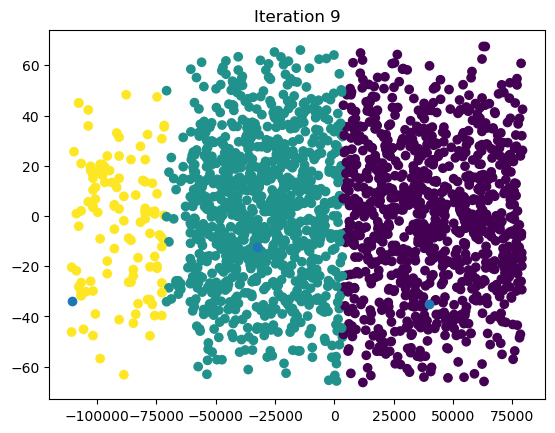

In [26]:

max_iterations = 300
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

### kmeans nous donne 3 cluster

In [27]:
with open('clustring.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

# Save the scaler (important for preprocessing future data)
with open('clustringscaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [28]:
with open('kmeans_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the scaler
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

In [29]:
from sklearn.cluster import AgglomerativeClustering


In [30]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

df['Agglomerative_Cluster'] = agglo_labels


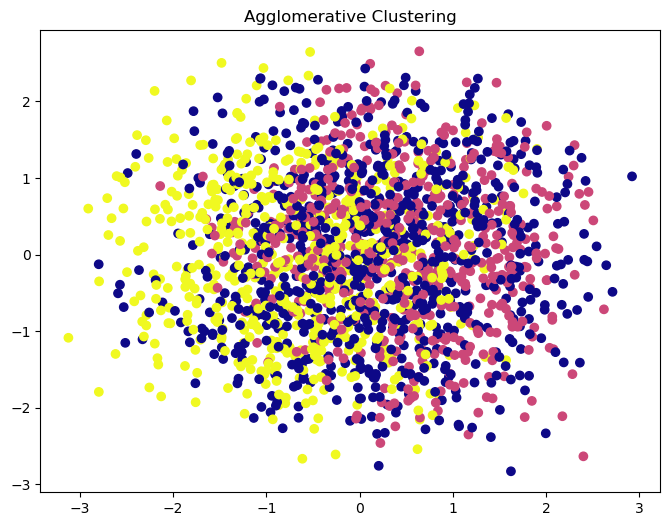

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.title('Agglomerative Clustering')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='plasma')
plt.show()

# Save Agglomerative model labels (no model object to save because Agglomerative doesn't "predict" new points easily)
df.to_csv('clustered_data.csv', index=False)

### Agglomerative Clustering a nous donne aussi 3 cluster 

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, df['Cluster'])
silhouette_agglo = silhouette_score(X_scaled, df['Agglomerative_Cluster'])

# Calinski-Harabasz Index
calinski_kmeans = calinski_harabasz_score(X_scaled, df['Cluster'])
calinski_agglo = calinski_harabasz_score(X_scaled, df['Agglomerative_Cluster'])

# Davies-Bouldin Index
davies_kmeans = davies_bouldin_score(X_scaled, df['Cluster'])
davies_agglo = davies_bouldin_score(X_scaled, df['Agglomerative_Cluster'])



🔵 KMeans Results:
Silhouette Score: 0.145
Calinski-Harabasz Index: 323.859
Davies-Bouldin Index: 2.112

🟠Agglomerative Clustering Results:
Silhouette Score: 0.122
Calinski-Harabasz Index: 283.873
Davies-Bouldin Index: 2.499